<a href="https://colab.research.google.com/github/rahularani/Diabetes-Prediction-Models/blob/main/final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# Diabetes Prediction - Google Colab Version
# ===============================

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from google.colab import files
import io

# Step 2: Upload the dataset
print("Please upload the diabetes dataset CSV file:")
uploaded = files.upload()

# Step 3: Load the dataset with column names
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]), names=column_names)

# Step 4: Display basic info
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# Step 5: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 6: Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model Training

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 9: Evaluation

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Classification Report:")
print(classification_report(y_test, log_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_preds))

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))


Please upload the diabetes dataset CSV file:


Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                 

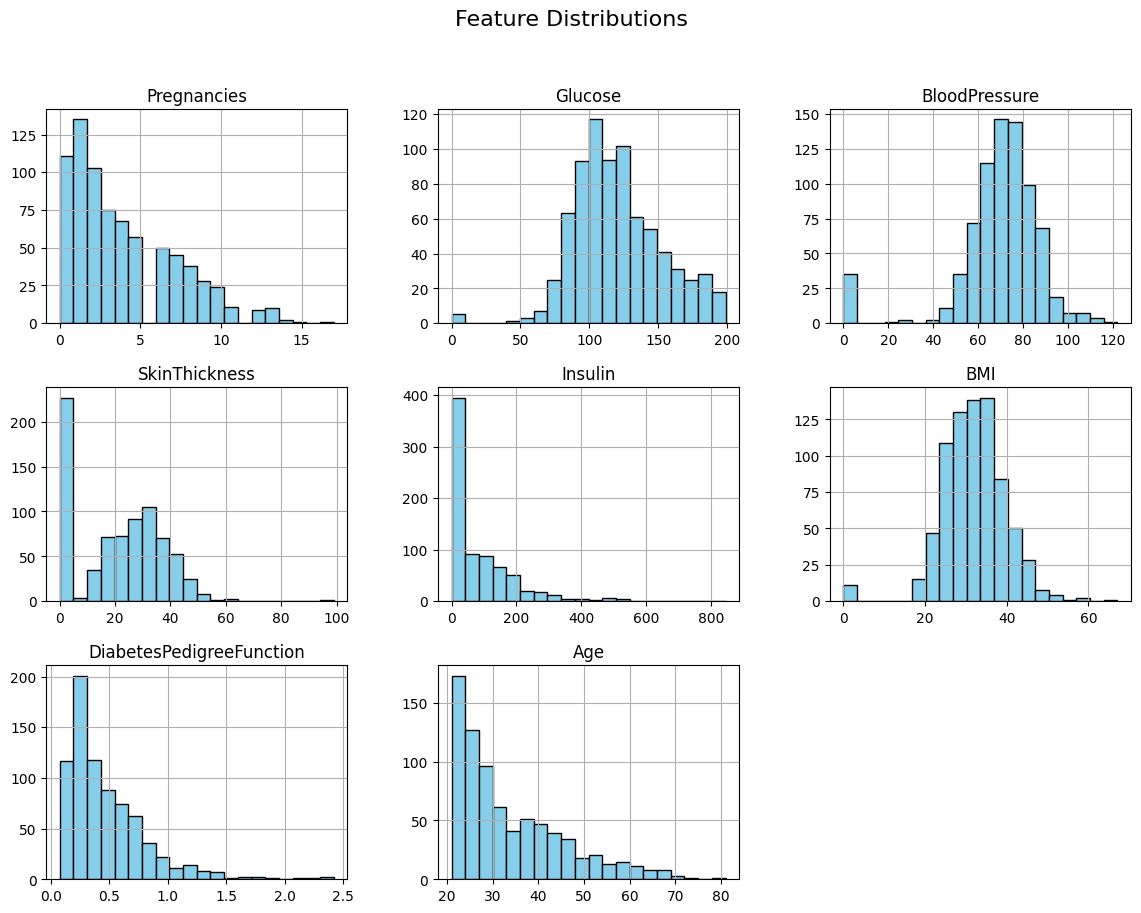

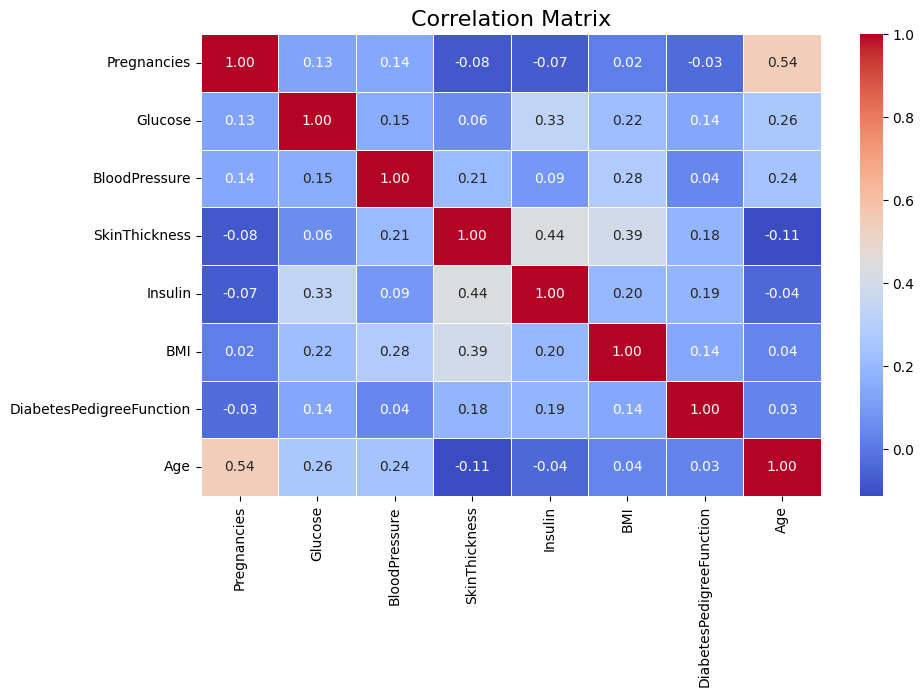

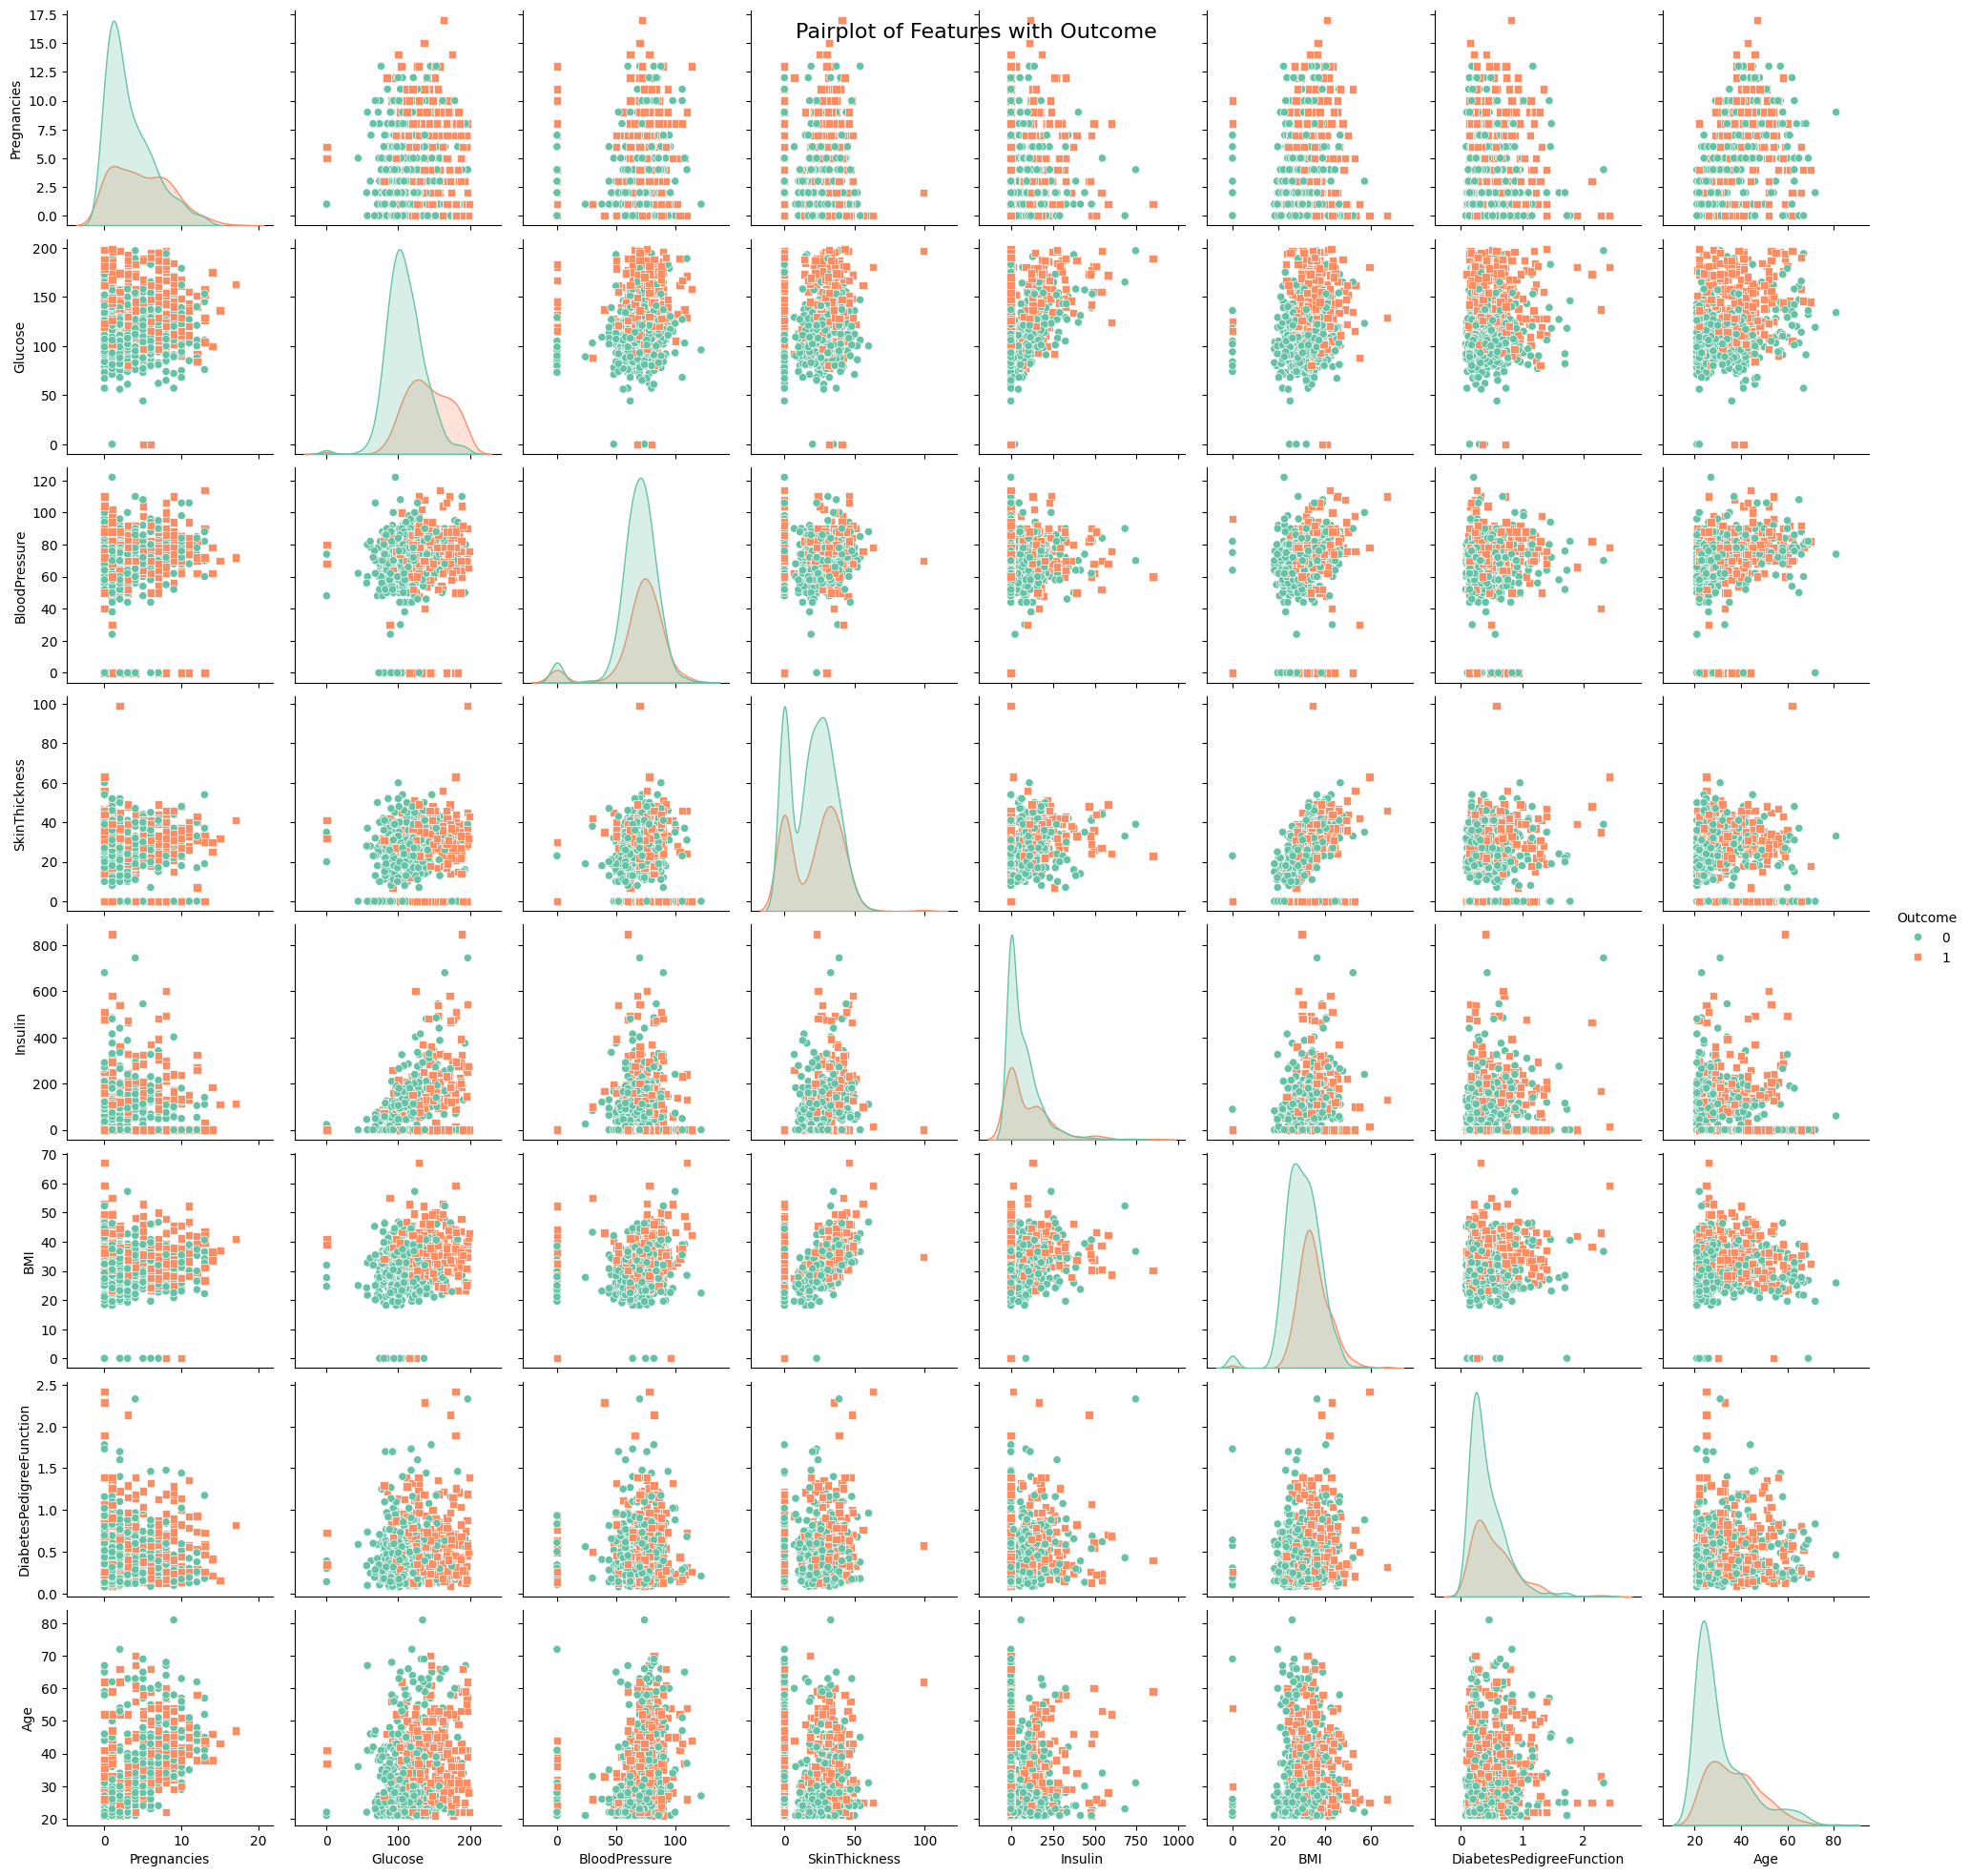

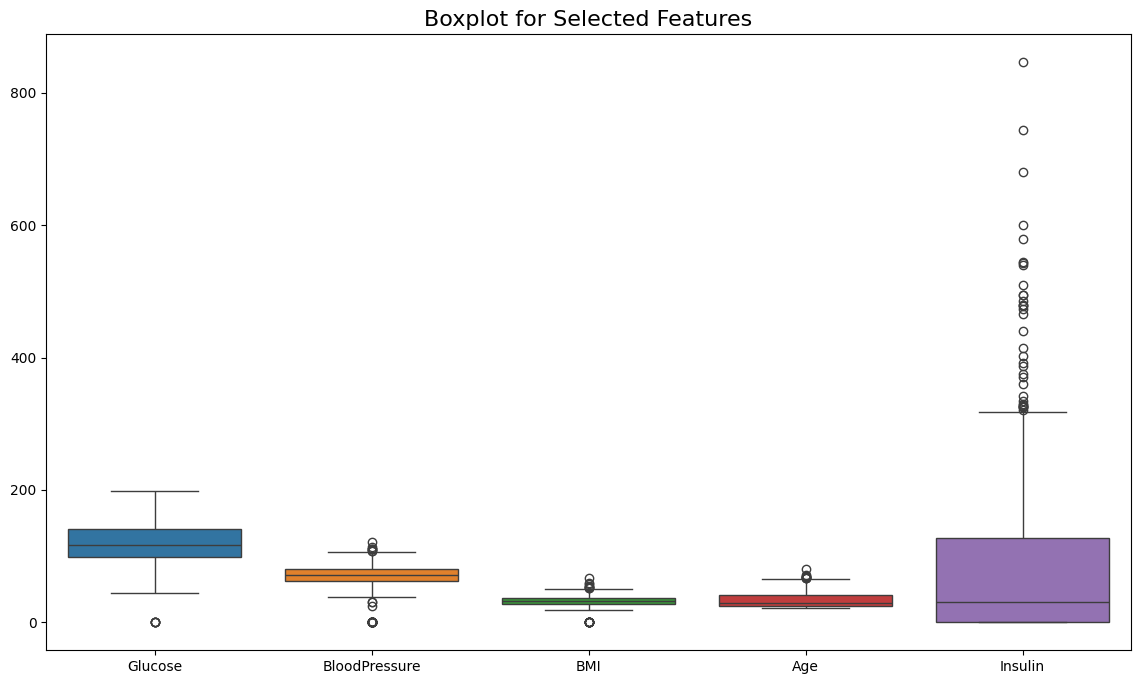

<ipython-input-2-f516c152e2bd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


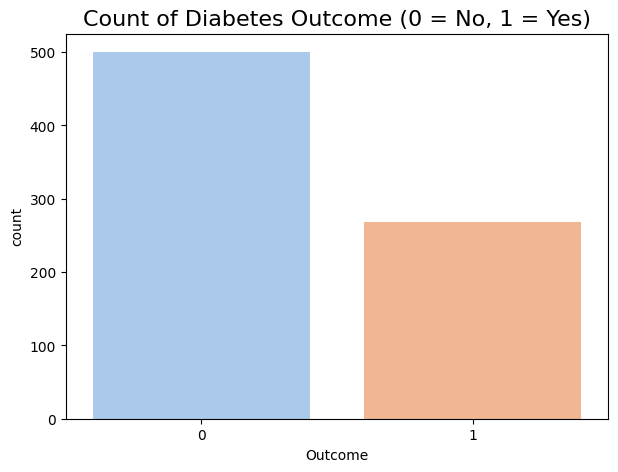

In [ ]:
# Step 4.1: Visualizing the Feature Distributions (Histograms)
df.drop('Outcome', axis=1).hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Step 4.2: Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
corr = df.drop('Outcome', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Step 4.3: Pairplot for Feature Relationships with Outcome
sns.pairplot(df, hue='Outcome', palette='Set2', markers=["o", "s"], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Features with Outcome', fontsize=16)
plt.show()

# Step 4.4: Boxplot to detect outliers for selected features
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Insulin']])
plt.title('Boxplot for Selected Features', fontsize=16)
plt.show()

# Step 4.5: Countplot for Outcome (Diabetes Yes/No)
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title('Count of Diabetes Outcome (0 = No, 1 = Yes)', fontsize=16)
plt.show()
